Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

#### Let's take an example of gmail
#### Training
* On marking mail as spam
* model tries to find the probability of mail becoming a spam for each word

#### Prediction
* When a new mail arrives
* Using probability for each word in the mail, it finds out the cumulative probability of the entire mail becomeing a spam or not

#### Gaussian Naive Bayes
* Simpliest Naive Bayes

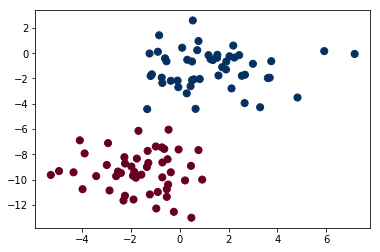

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
#100 - total number of data points
#2 - total number of features or number of cols.
#centers (2) - 
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [2]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [3]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1])

In [4]:
X

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691],
       [  1.90846569,  -0.6583068 ],
       [  2.99659881,  -0.83960814],
       [ -1.75036425,  -8.32495776],
       [  1.26386427,  -0.46380574],
       [ -2.92821038,  -7.10474478],
       [ -1.18679697,  -1.80057881],
       [ -0.70730261,  -8.6320622 ],
       [ -0.597949  ,  -0.40605237],
       [ -3.88704121,  -7.92023943],
       [ -0.49365731,  -8.378556  ],
       [ -0.97378999,  -7.371431  ],
       [  0.7183647 ,   0.23622995],
       [  1.355409  ,  -0.54741367],
       [ -0.47151448, -10.37571491],
       [ -0.95592795, -12.26939394],
       [ -2.5972638 ,  -9.71612662],
       [  0.44653092,  -2.60752136],
 

In [5]:
import numpy as np
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

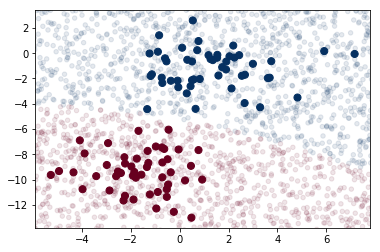

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

#Testing with new dataset
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [1]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics','misc.forsale']
#Getting above 5 classes of train data or 5 classes of test data
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
train.target_names

['comp.graphics',
 'misc.forsale',
 'sci.space',
 'soc.religion.christian',
 'talk.religion.misc']

In [7]:
train.data[0]

'From: ma225121@umbc.edu (Jonas Schlein)\nSubject: Olivetti XT\nOrganization: University of Maryland, Baltimore County Campus\nLines: 8\nDistribution: world\nNNTP-Posting-Host: umbc8.umbc.edu\nX-Auth-User: ma225121\n\nI am selling an AT&T XT compatible. It comes with a green screen CGA monitor,\n360k 5.25" Floppy Drive, and a 20 Megabyte Hard Drive.\n\nYou would think it was brand new from the condition it\'s in.\n\nAsking price is $150 + Shipping.\n\nReply via E-Mail if interested.\n'

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#MultinomialNB - More than 2 classes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
#model = make_pipeline(CountVectorizer(), MultinomialNB())

In [4]:
#model is a pipeline, doing fit on it causes all data to be subjected to tranformation & evaluation
model.fit(train.data, train.target)

labels = model.predict(test.data)

In [5]:
labels

array([0, 3, 3, ..., 3, 1, 2], dtype=int64)

In [8]:
model.predict(['god photos for sale'])

array([1], dtype=int64)

In [13]:
#Finding how good algorithm is - accuracy detection

In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score
mat = confusion_matrix(test.target, labels)

In [10]:
mat

array([[360,   6,  13,  10,   0],
       [  9, 375,   4,   2,   0],
       [  8,   2, 379,   5,   0],
       [  2,   0,   5, 389,   2],
       [  5,   2,  19, 136,  89]], dtype=int64)

In [10]:
accuracy_score(test.target, labels)

0.87376509330406149

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

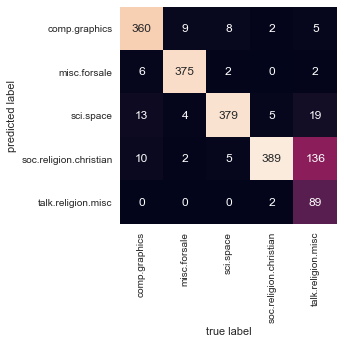

In [12]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
def predict_category(s, model=model):
    pred = model.predict([s])
    print(model.predict_proba([s]))
    return train.target_names[pred[0]]

In [27]:
predict_category('jesus save us')

[[ 0.07992744  0.08870303  0.06759854  0.55063981  0.21313118]]


'soc.religion.christian'

In [25]:
predict_category("payload to ISS")

'sci.space'

In [24]:
predict_category('determine screen resolution')

'comp.graphics'

### When to use Naive Bayes
* Extreamly fast for both training & prediction
* Very few tunable params
* Provides probalistic solution

In [31]:
predict_category('curve of mary cup')

'soc.religion.christian'

In [8]:
#Understanding tfidf
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [9]:
#stop_words - don't consider regular words like is,the etc
tfidf = TfidfVectorizer(stop_words='english')

In [10]:
data = ['hello this is good','good stuff','good place']

In [12]:
tfidf.fit_transform(data).toarray()

array([[ 0.50854232,  0.861037  ,  0.        ,  0.        ],
       [ 0.50854232,  0.        ,  0.        ,  0.861037  ],
       [ 0.50854232,  0.        ,  0.861037  ,  0.        ]])

In [15]:
# word 'is' is not considered since stop_words is configured 
tfidf.get_feature_names()

['good', 'hello', 'place', 'stuff']